# Telco Customer Churn Analysis and Prediction

_Matteo Facchetti_, _Mario Damiano Russo_, _Mirko Frigerio_.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Univariate-and-Bivariate-Analysis" data-toc-modified-id="Univariate-and-Bivariate-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Univariate and Bivariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Customer-Churn" data-toc-modified-id="Customer-Churn-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Customer Churn</a></span></li><li><span><a href="#Gender-distribution" data-toc-modified-id="Gender-distribution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gender distribution</a></span></li><li><span><a href="#Age-distribution" data-toc-modified-id="Age-distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Age distribution</a></span></li><li><span><a href="#Phone-Service-distribution" data-toc-modified-id="Phone-Service-distribution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Phone Service distribution</a></span></li><li><span><a href="#Internet-service-distribution" data-toc-modified-id="Internet-service-distribution-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Internet service distribution</a></span></li><li><span><a href="#Tenure-distribution" data-toc-modified-id="Tenure-distribution-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Tenure distribution</a></span></li><li><span><a href="#Contract-distribution" data-toc-modified-id="Contract-distribution-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Contract distribution</a></span></li></ul></li><li><span><a href="#Dealing-with-Missing-Values" data-toc-modified-id="Dealing-with-Missing-Values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dealing with Missing Values</a></span><ul class="toc-item"><li><span><a href="#Encoding-the-dummy-variables" data-toc-modified-id="Encoding-the-dummy-variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Encoding the dummy variables</a></span></li></ul></li><li><span><a href="#Dealing-with-Outliers" data-toc-modified-id="Dealing-with-Outliers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dealing with Outliers</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Resampling-methods" data-toc-modified-id="Resampling-methods-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Resampling methods</a></span></li></ul></div>

In [124]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pylab as pl
import scikitplot as skplt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline
import os
from PIL import  Image
import io
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.figure_factory as ff
import matplotlib.ticker as mtick
import scipy

In [125]:
tcc = pd.read_csv("tcc.csv")

In [126]:
tcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Univariate and Bivariate Analysis

### Customer Churn

Let's first have a look at the churn rate.

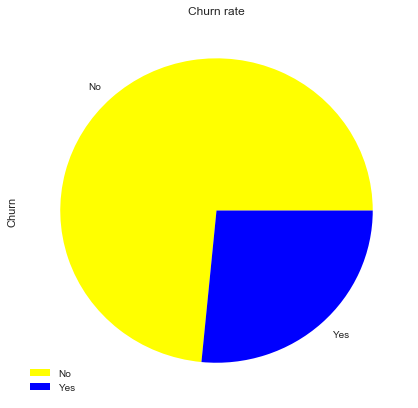

In [127]:
senior = (tcc['Churn'].value_counts()*100.0 /len(tcc)).plot(kind='pie',\
        labels = ['No', 'Yes'], figsize = (7,7) , colors = ['yellow','blue'])

senior.set_title('Churn rate')
senior.legend(labels=['No','Yes']);

One customer over four churns.

### Gender distribution

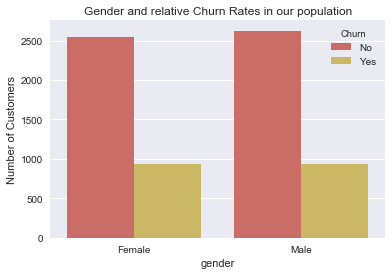

In [128]:
gb = tcc.groupby("gender")["Churn"].value_counts().to_frame().rename({"Churn": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "gender", y = "Number of Customers", data = gb, hue = "Churn", palette = sns.color_palette("hls", 8)).set_title("Gender and relative Churn Rates in our population");

Men and women are evenly distributed in our sample, and show the same proportions of Churn.

### Age distribution

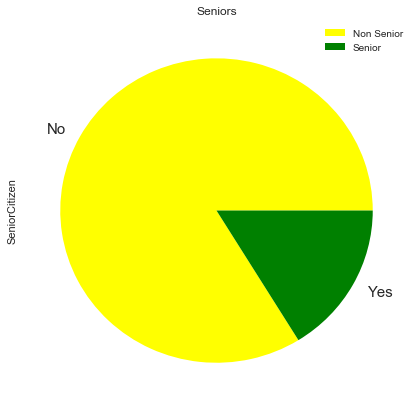

In [129]:
senior = (tcc['SeniorCitizen'].value_counts()*100.0 /len(tcc)).plot(kind='pie',\
        labels = ['No', 'Yes'], figsize = (7,7) , colors = ['yellow','green'], fontsize = 15)

senior.set_title('Seniors')
senior.legend(labels=['Non Senior','Senior']);

In [130]:
gb = tcc.groupby("SeniorCitizen")["Churn"].value_counts().to_frame().rename({"Churn": "Number of Customers"}, axis = 1).reset_index()
gb.replace([0, 1], ["Young", "Senior"], inplace = True)
gb

,SeniorCitizen,Churn,Number of Customers
0,Young,No,4508
1,Young,Yes,1393
2,Senior,No,666
3,Senior,Yes,476


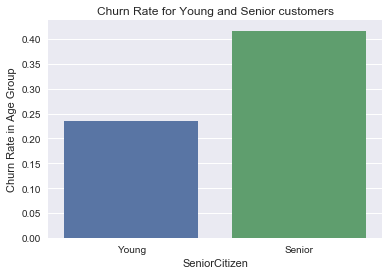

In [131]:
tp = gb.groupby("SeniorCitizen")["Number of Customers"].sum().to_frame().reset_index().rename({"Number of Customers": "# Customers in Age Group"}, axis = 1)
gb = pd.merge(gb, tp, on = "SeniorCitizen")
gb["Churn Rate in Age Group"] = gb["Number of Customers"]/gb["# Customers in Age Group"]
gb = gb[gb.Churn == "Yes"]

sns.barplot(x = "SeniorCitizen", y = "Churn Rate in Age Group", data = gb).set_title("Churn Rate for Young and Senior customers");

Our sample is mainly composed by young people. Senior customers are more prone to churning.

### Phone Service distribution

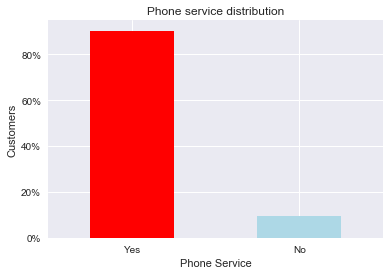

In [132]:
phone = (tcc['PhoneService'].value_counts()*100.0 /len(tcc)).plot(kind='bar', stacked = True,\
                                                rot = 0, color = ['red','lightblue'])
  
phone.yaxis.set_major_formatter(mtick.PercentFormatter())
phone.set_ylabel('Customers')
phone.set_xlabel('Phone Service')
phone.set_ylabel('Customers')
phone.set_title('Phone service distribution');

Just a little amount of people does not have phone service.

### Internet service distribution

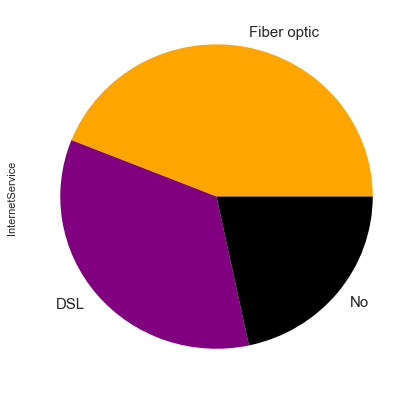

In [133]:
internet = (tcc['InternetService'].value_counts()*100.0 /len(tcc)).plot(kind='pie',\
        labels = ['Fiber optic', 'DSL', 'No'], figsize = (7,7) , colors = ['orange','purple', 'black'], fontsize = 15)

senior.set_title('Seniors')
senior.legend(labels=['Non Senior','Senior']);

Among the ones that have internet service, DSL and Fiber optic are almost equally distributed (the fraction of people having Fiber optic is slightly greater). Less than one fourth of the members of our sample has no internet service.

### Tenure distribution

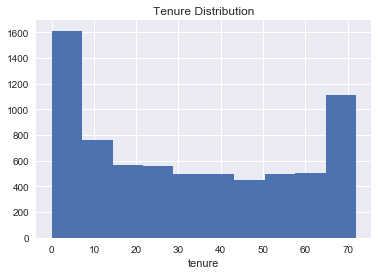

In [134]:
plt.hist(tcc.tenure)
plt.xlabel('tenure')
plt.title("Tenure Distribution");

The majority of the customers in our sample are new clients. There is also a high number of people with a tenure around 70 months. Most likely the company is not older than 72 months, and there either was a strong incentive for subscription (like a competitive launch offer, which could explain the high number through efficient retention rates) or there was some form of selection bias (the offers were unique on the market and highly valued by a group of customers, leading to fast market saturation, which could explain the high number by keeping the retention rate constant and leveraging high sales volumes). These are the only two reasons that can explain such a sharp kickstart in the number of subscriptions and their sudden drop.

### Contract distribution

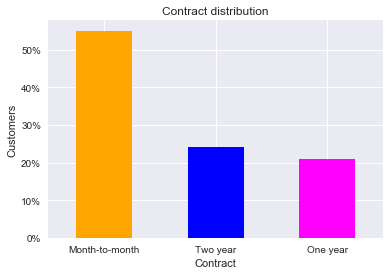

In [135]:
contract = (tcc['Contract'].value_counts()*100.0 /len(tcc)).plot(kind='bar', stacked = True,\
                                                rot = 0, color = ['orange','blue','magenta'])
  
contract.yaxis.set_major_formatter(mtick.PercentFormatter())
contract.set_ylabel('Customers')
contract.set_xlabel('Contract')
contract.set_ylabel('Customers')
contract.set_title('Contract distribution');

More than half customers have a month-to-month contract.

In [136]:
tcc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Dealing with Missing Values

In [137]:
missing_values = []
for col in tcc.columns:
    missing_values.append(tcc[col].isna().any())

missing_values = pd.DataFrame(np.array(missing_values).reshape(1, 21))
missing_values.columns = tcc.columns
missing_values_table   = tcc.append(missing_values).tail(1)
missing_values_table   = missing_values_table.astype(bool)
missing_values_table   = missing_values_table.transpose()
missing_values_table.columns = ["Missing?"]

missing_values_table["dtype"] = tcc.dtypes
missing_values_table

,Missing?,dtype
customerID,False,object
gender,False,object
SeniorCitizen,False,int64
Partner,False,object
Dependents,False,object
tenure,False,int64
PhoneService,False,object
MultipleLines,False,object
InternetService,False,object
OnlineSecurity,False,object


The dtypes are not coherent with logic. There's no point in encoding TotalCharges as a string and MonthlyCharges as a float, or PhoneService as Yes/No and SeniorCitizen as a 0/1 dummy. Let's fix that.

In [138]:
try:
    tcc.TotalCharges.astype("float64")
except ValueError:
    print("We can't convert this column to floats, there must be some non-convertible values")

We can't convert this column to floats, there must be some non-convertible values


In [139]:
print(tcc.TotalCharges.value_counts().head())
print("")
print("We have 11 observations that take an empty string value. Let's drop that. The string we want to drop is:")
tcc.TotalCharges.value_counts().index[1]

20.2     11
         11
19.75     9
19.9      8
19.65     8
Name: TotalCharges, dtype: int64

We have 11 observations that take an empty string value. Let's drop that. The string we want to drop is:


' '

Let's drop the observations with empty values, reset the index and now we should be able to convert the TotalCharges column to float:

In [140]:
tcc.drop(tcc[tcc.TotalCharges == " "].index, axis = 0, inplace = True)
tcc.reset_index(drop = True, inplace = True)

In [141]:
tcc.TotalCharges = tcc.TotalCharges.astype("float64")

Let's compute some last computations before extracting the Dummy Variables from our dataset and proceeding to the Regression Part.

In [142]:
for col in tcc.columns:
    print("{0}: {1}".format(col, tcc.loc[:, col].unique()))

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 '

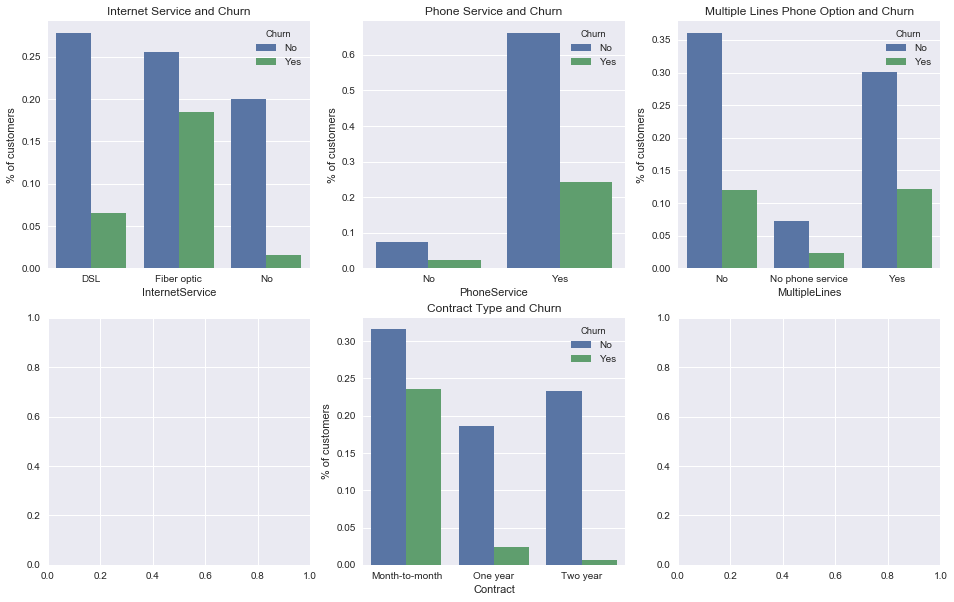

In [143]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10))

gb = tcc.groupby("InternetService")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "InternetService", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][0]).set_title("Internet Service and Churn");

gb = tcc.groupby("PhoneService")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "PhoneService", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][1]).set_title("Phone Service and Churn");

gb = tcc.groupby("MultipleLines")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "MultipleLines", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][2]).set_title("Multiple Lines Phone Option and Churn");

gb = tcc.groupby("Contract")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "Contract", y = "% of customers", data = gb, hue = "Churn", ax = axis[1][1]).set_title("Contract Type and Churn");

We notice that The customers with Fiber optic tend to churn a lot more when compared to DSL and No Internet. Maybe the Internet connection offered is low-quality? (Other option: Elder Customers don't need an internet connection. Spoiler: No. See following graph that proves that elderly are proportionally more connected than youngsters and are only a reduced percentage of the population).

MultipleLines do not seem to affect the churn rate.

Shorter-term contract renewals are highly correlated with the churn rate. But most likely it's an omitted variable bias issue: the more I trust a provider, the more I reason in long-terms with it.

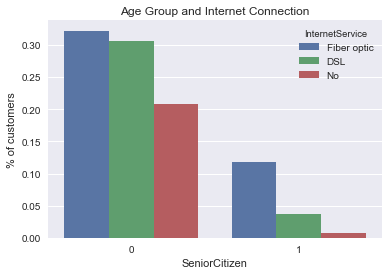

In [144]:
gb = tcc.groupby("SeniorCitizen")["InternetService"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"InternetService": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "SeniorCitizen", y = "% of customers", data = gb, hue = "InternetService").set_title("Age Group and Internet Connection");

Now we want to see how the "Additional Internet Services" that follow the variable pattern: ["No", "Yes", "No internet service"] affect the churn rate.

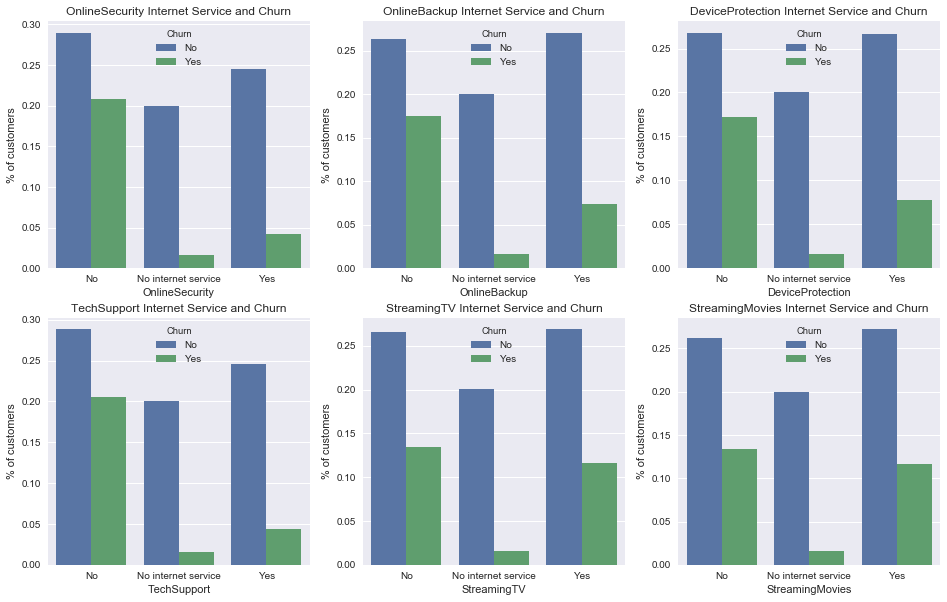

In [145]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10))

gb = tcc.groupby("OnlineSecurity")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "OnlineSecurity", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][0]).set_title("OnlineSecurity Internet Service and Churn")

gb = tcc.groupby("OnlineBackup")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "OnlineBackup", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][1]).set_title("OnlineBackup Internet Service and Churn")

gb = tcc.groupby("DeviceProtection")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "DeviceProtection", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][2]).set_title("DeviceProtection Internet Service and Churn")

gb = tcc.groupby("TechSupport")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "TechSupport", y = "% of customers", data = gb, hue = "Churn", ax = axis[1][0]).set_title("TechSupport Internet Service and Churn")

gb = tcc.groupby("StreamingTV")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "StreamingTV", y = "% of customers", data = gb, hue = "Churn", ax = axis[1][1]).set_title("StreamingTV Internet Service and Churn")

gb = tcc.groupby("StreamingMovies")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "StreamingMovies", y = "% of customers", data = gb, hue = "Churn", ax = axis[1][2]).set_title("StreamingMovies Internet Service and Churn");

- OnlineSecurity, OnlineBackup, TechSupport seem to have a significant impact on lowering the churn. If the company wants to lower the churn rate, It may be a good idea to include these services as standard in the following order: OnlineSecurity, TechSupport, OnlineBackUp, DeviceProtection (although removing the internet connection service altogether may be potentially be more beneficial, at least the Fiber one; see graphs above for details). Although unlikely, it is also possible that these services get cumulated with tenure, and thus their effect on the churn only reflects the negative impact of tenure on the churn rate; in the next cells we will try to figure out whether this is true or not.

- StreamingTV and StreamingMovies do not seem to have a large enough effect on customer Churn Rate.

To assess whether additional services are accumulated through tenure (e.g. fidalty programs), we run a lmplot for each additional Internet service.

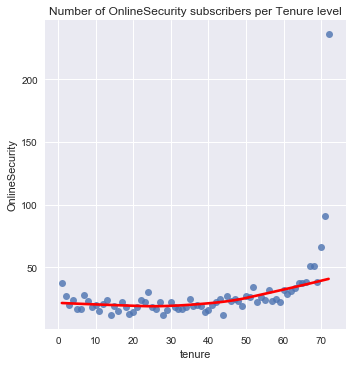

In [146]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["OnlineSecurity"].sum().to_frame().reset_index()
sns.lmplot("tenure", "OnlineSecurity", data = gb, line_kws={'color': 'red'}, lowess = True);
ax = plt.gca()
ax.set_title("Number of OnlineSecurity subscribers per Tenure level");

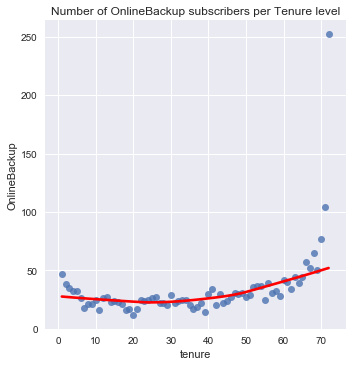

In [147]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["OnlineBackup"].sum().to_frame().reset_index()
sns.lmplot("tenure", "OnlineBackup", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of OnlineBackup subscribers per Tenure level");

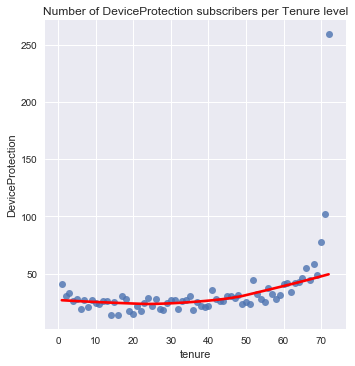

In [148]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["DeviceProtection"].sum().to_frame().reset_index()
sns.lmplot("tenure", "DeviceProtection", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of DeviceProtection subscribers per Tenure level");

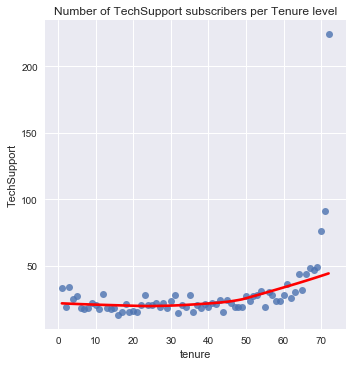

In [149]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["TechSupport"].sum().to_frame().reset_index()
sns.lmplot("tenure", "TechSupport", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of TechSupport subscribers per Tenure level");

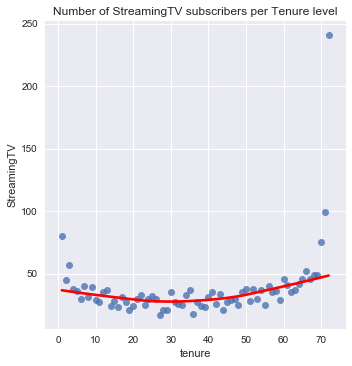

In [150]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["StreamingTV"].sum().to_frame().reset_index()
sns.lmplot("tenure", "StreamingTV", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of StreamingTV subscribers per Tenure level");

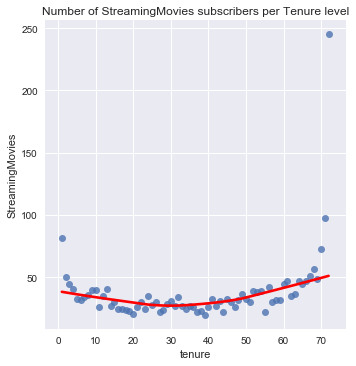

In [151]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["StreamingMovies"].sum().to_frame().reset_index()
sns.lmplot("tenure", "StreamingMovies", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of StreamingMovies subscribers per Tenure level");

The absolute number of each Additional Service seems to move in syncro with the others as tenure increases. It does not seem that there is any significant correlation between the number of active Additional Services and tenure, although people with borderline tenures have an extremely high number of Additional Services.

It's weird that so many people with high tenures have so many additional services. Is it just that there are many people with maximum tenure although the percentage of additional services across tenure level stays the same? Hypothesis: at the beginning, the company had a launch offer all-included. Let's check the percentages of people that have these services for each tenure level.

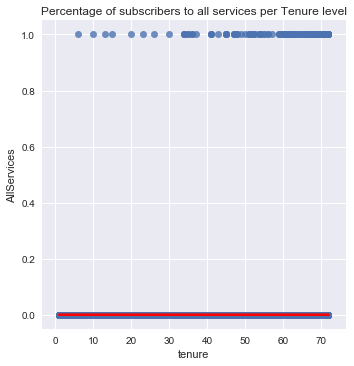

In [152]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0])
gb["AllServices"] = gb.OnlineSecurity*gb.OnlineBackup*gb.DeviceProtection*gb.TechSupport*gb.StreamingTV*gb.StreamingMovies
sns.lmplot("tenure", "AllServices", data = gb, line_kws={'color': 'red'}, lowess = True);
ax = plt.gca()
ax.set_title("Percentage of subscribers to all services per Tenure level");

In [153]:
tvc = gb.tenure.value_counts()
i = []
v = []
for tenure in tvc.index:
    i.append(tenure)
    v.append(len(gb[(gb.tenure == tenure) & (gb.AllServices == 1)])/len(gb[gb.tenure == tenure]))

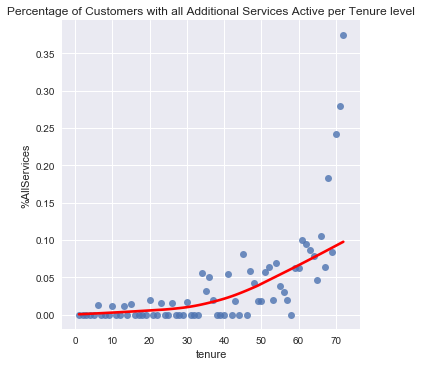

In [154]:
df = pd.DataFrame(data = v, index = i, columns = ["%AllServices"]).reset_index().sort_values("index").reset_index(drop = True).rename({"index": "tenure"}, axis = 1)
sns.lmplot("tenure", "%AllServices", data = df, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Percentage of Customers with all Additional Services Active per Tenure level");

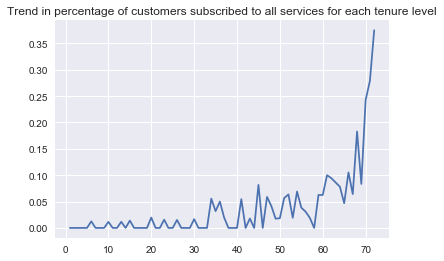

In [155]:
plt.plot(df.tenure, df["%AllServices"]);
ax = plt.gca()
ax.set_title("Trend in percentage of customers subscribed to all services for each tenure level");

<a id='HERE'></a>

Indeed, it seems that the people who subscribed for first have many additional services. Possible explanations:
- Launch offer: all additional services forever included at a discounted price.
- Selection bias: the first customers are the ones who appreciate the most the services offered by the company.

Either case, we can dismiss the hypothesis that additional services are accumulated through tenure, for two reasons:
- There is a strong spike up in the percentage and number of users with all the services around tenure = 70. Nonetheless, the trend in percentage of users with all the services grows constantly, while the absolute number of the individual services stays pretty much constant across tenure levels. This means the the increase in percentage is justifiable only by a convenient launch offer all-inclusive, that rules out the large amount of active offers for customers with extremely high tenure. [This regression](#another_cell) confirms our result;
- if there was a cumulation of benefits, the drop on the 69th tenure value could be hardly justifiable, whereas it could be justified by a change in the offer or a decrease in interest towards the company.

### Encoding the dummy variables

In [156]:
tcc = pd.get_dummies(tcc.iloc[:, 1 :])
tcc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [157]:
tcc.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet serv

Let's have a look at the variables.

In [158]:
for col in tcc.columns:
    print("{0}: {1}".format(col, tcc.loc[:, col].unique()))

SeniorCitizen: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
gender_Female: [1 0]
gender_Male: [0 1]
Partner_No: [0 1]
Partner_Yes: [1 0]
Dependents_No: [1 0]
Dependents_Yes: [0 1]
PhoneService_No: [1 0]
PhoneService_Yes: [0 1]
MultipleLines_No: [0 1]
MultipleLines_No phone service: [1 0]
MultipleLines_Yes: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
OnlineSecurity_No: [1 0]
OnlineSecurity_No internet service: [0 1]
OnlineSecurity_Yes: [0 1]
OnlineBackup_No: [0 1]
OnlineBackup_No internet service: [0 1]
OnlineBackup_Yes: [1 0]
DeviceProtection_No: [1 0]
DeviceProtection_No internet service: [0 1]
DeviceProtection_Yes: [0 1]
Tech

## Dealing with Outliers

In [159]:
tcc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


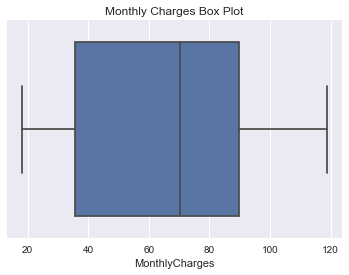

In [160]:
sns.boxplot(x = tcc.MonthlyCharges).set_title("Monthly Charges Box Plot");

/home/matteo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



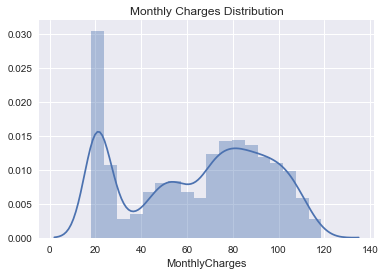

In [161]:
sns.distplot(tcc.MonthlyCharges).set_title("Monthly Charges Distribution");

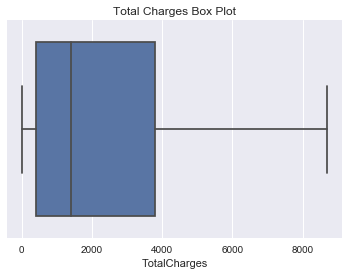

In [162]:
sns.boxplot(x = tcc.TotalCharges).set_title("Total Charges Box Plot");

/home/matteo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



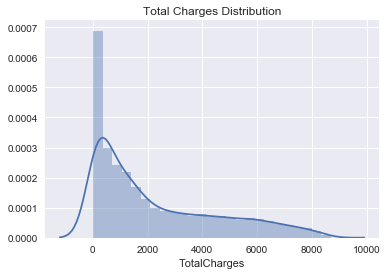

In [163]:
sns.distplot(tcc.TotalCharges).set_title("Total Charges Distribution");

In [164]:
tcc.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

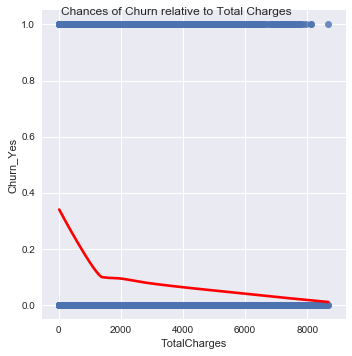

In [165]:
sns.lmplot("TotalCharges", "Churn_Yes", data = tcc, line_kws={'color': 'red'}, lowess = True, size = 5)
plt.suptitle("Chances of Churn relative to Total Charges");

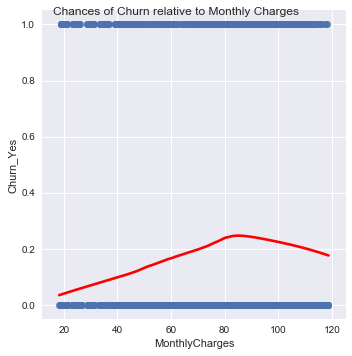

In [166]:
sns.lmplot("MonthlyCharges", "Churn_Yes", data = tcc, line_kws={'color': 'red'}, lowess = True, size = 5)
plt.suptitle("Chances of Churn relative to Monthly Charges");

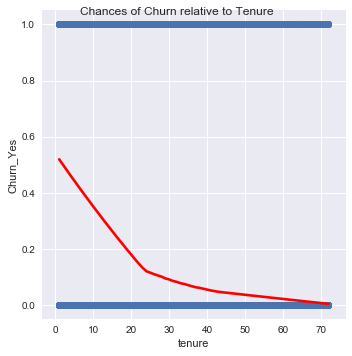

In [167]:
sns.lmplot("tenure", "Churn_Yes", data = tcc, line_kws={'color': 'red'}, lowess = True, size = 5)
plt.suptitle("Chances of Churn relative to Tenure");

## Logistic regression

We want to build a predictive model using _Churn_ as our dependent variable. First we try to run the regression by including all the variables.

In [168]:
tcc.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

Most of the variables differentiate between "No" and "No internet service". Given that the information about "Internet Service" or "No internet service" is already provided by the variable _InternetService_, we can just analyze the impact of having a service that implies having Internet Service versus not having it, without considering that a person could have for example no OnlineSecurity due to the fact that they do not have Internet Service.

We will also exclude _TotalCharges_ from our model, since it is likely to be correlated with _MonthlyCharges_ (we are going to test this hypothesis by calculating the Pearson correlation coefficient).

In [169]:
# Pearson correlation coefficient
print("Coefficient:",scipy.stats.pearsonr(tcc["MonthlyCharges"], tcc["TotalCharges"])[0])
print("p-value:",scipy.stats.pearsonr(tcc["MonthlyCharges"], tcc["TotalCharges"])[1])

Coefficient: 0.6510648032262024
p-value: 0.0


The two variables are highly correlated.

In [170]:
tcc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


Let's run a first regression including all the variables. We will then progressively improve our model.

In [171]:
# Intercept
tcc["intercept"] = 1.0

variables = tcc.copy()[['SeniorCitizen', 'tenure', 'MonthlyCharges', 
       'gender_Female', 'Partner_Yes', 'PhoneService_Yes',
        'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning:

divide by zero encountered in log

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Optimization terminated successfully.
         Current function value: inf
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
========================================================================================
Model:                       Logit                     Pseudo R-squared:          inf   
Dependent Variable:          Churn_Yes                 AIC:                       inf   
Date:                        2018-12-24 21:59          BIC:                       inf   
No. Observations:            7032                      Log-Likelihood:            -inf  
Df Model:                    22                        LL-Null:                   0.0000
Df Residuals:                7009                      LLR p-value:               1.0000
Converged:                   1.0000                    Scale:                     1.0000
No. Iterations:              8.0000                                                     
----------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------
SeniorCitizen                            0.2181   0.0849   2.5680 0.0102  0.0516  0.3846
tenure                                  -0.0344   0.0024 -14.4672 0.0000 -0.0390 -0.0297
MonthlyCharges                          -0.0325   0.0320  -1.0181 0.3086 -0.0952  0.0301
gender_Female                            0.0206   0.0649   0.3168 0.7514 -0.1066  0.1477
Partner_Yes                             -0.0010   0.0778  -0.0127 0.9899 -0.1534  0.1514
PhoneService_Yes                         0.1601   0.6531   0.2451 0.8063 -1.1200  1.4402
Dependents_Yes                          -0.1640   0.0897  -1.8290 0.0674 -0.3398  0.0117
MultipleLines_Yes                        0.4641   0.1782   2.6039 0.0092  0.1148  0.8134
InternetService_DSL                      1.6163   0.8125   1.9892 0.0467  0.0238  3.2088
InternetService_Fiber optic              3.3322   1.6057   2.0753 0.0380  0.1852  6.4793
OnlineSecurity_Yes                      -0.1992   0.1798  -1.1077 0.2680 -0.5515  0.1532
OnlineBackup_Yes                         0.0509   0.1764   0.2884 0.7730 -0.2949  0.3966
DeviceProtection_Yes                     0.1629   0.1774   0.9182 0.3585 -0.1848  0.5105
TechSupport_Yes                         -0.1695   0.1817  -0.9328 0.3509 -0.5257  0.1867
StreamingTV_Yes                          0.5936   0.3287   1.8061 0.0709 -0.0506  1.2378
StreamingMovies_Yes                      0.6057   0.3291   1.8404 0.0657 -0.0394  1.2507
Contract_One year                       -0.6625   0.1067  -6.2088 0.0000 -0.8716 -0.4534
Contract_Two year                       -1.3350   0.1745  -7.6498 0.0000 -1.6771 -0.9930
PaperlessBilling_Yes                     0.3360   0.0743   4.5228 0.0000  0.1904  0.4816
PaymentMethod_Bank transfer (automatic)  0.0048   0.1137   0.0424 0.9662 -0.2181  0.2278
PaymentMethod_Credit card (automatic)   -0.0827   0.1154  -0.7160 0.4740 -0.3089  0.1436
PaymentMethod_Electronic check           0.3184   0.0956   3.3327 0.0009  0.1312  0.5057
intercept                               -1.0317   0.1754  -5.8805 0.0000 -1.3755 -0.6878
========================================================================================

"""

To improve the goodness of our results we can first work on _PaymentMethod_. We will transform the variable _PaymentMethod_ in order to analyze the difference between automatic Payment Method and non automatic. Clients with automatic payment are less likely to churn with respect to clients with no automatic payment. We are not interested in the difference between Bank transfer and Credit card, or between Electronic check or Mailed check.

In [172]:
# Transforming PaymentMethod
tcc["PaymentMethod_Automatic"] = tcc["PaymentMethod_Bank transfer (automatic)"] + tcc["PaymentMethod_Credit card (automatic)"]

In [173]:
variables = tcc[['SeniorCitizen', 'tenure', 'MonthlyCharges', 
       'gender_Female', 'Partner_Yes',
        'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning:

divide by zero encountered in log

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2018-12-24 21:59      BIC:                   inf   
No. Observations:        7032                  Log-Likelihood:        -inf  
Df Model:                19                    LL-Null:               0.0000
Df Residuals:            7012                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.2324   0.0847   2.7452 0.0060  0.0665  0.3984
tenure                      -0.0340   0.0024 -14.3208 0.0000 -0.0386 -0.0293
MonthlyCharges              -0.0256   0.0062  -4.1323 0.0000 -0.0377 -0.0134
gender_Female                0.0245   0.0648   0.3779 0.7055 -0.1025  0.1514
Partner_Yes                  0.0106   0.0775   0.1363 0.8916 -0.1414  0.1625
Dependents_Yes              -0.1729   0.0895  -1.9323 0.0533 -0.3483  0.0025
MultipleLines_Yes            0.4368   0.0901   4.8478 0.0000  0.2602  0.6134
InternetService_DSL          1.5185   0.1728   8.7856 0.0000  1.1797  1.8573
InternetService_Fiber optic  3.1091   0.3360   9.2538 0.0000  2.4506  3.7676
OnlineSecurity_Yes          -0.2464   0.0909  -2.7109 0.0067 -0.4245 -0.0682
OnlineBackup_Yes             0.0147   0.0819   0.1798 0.8573 -0.1458  0.1753
DeviceProtection_Yes         0.1224   0.0838   1.4603 0.1442 -0.0419  0.2868
TechSupport_Yes             -0.2221   0.0920  -2.4149 0.0157 -0.4023 -0.0418
StreamingTV_Yes              0.5393   0.0993   5.4299 0.0000  0.3447  0.7340
StreamingMovies_Yes          0.5515   0.0983   5.6088 0.0000  0.3588  0.7442
Contract_One year           -0.6807   0.1065  -6.3886 0.0000 -0.8895 -0.4718
Contract_Two year           -1.3595   0.1742  -7.8046 0.0000 -1.7009 -1.0181
PaperlessBilling_Yes         0.3526   0.0740   4.7640 0.0000  0.2075  0.4976
PaymentMethod_Automatic     -0.2634   0.0725  -3.6356 0.0003 -0.4055 -0.1214
intercept                   -0.9218   0.1699  -5.4251 0.0000 -1.2548 -0.5888
============================================================================

"""

We will remove from our model _OnlineBackup_, _DeviceProtection_, _gender_ and _partner_ as they are not significant.

In [174]:
variables = tcc[['SeniorCitizen', 'tenure', 'MonthlyCharges', 
        'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning:

divide by zero encountered in log

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2018-12-24 21:59      BIC:                   inf   
No. Observations:        7032                  Log-Likelihood:        -inf  
Df Model:                15                    LL-Null:               0.0000
Df Residuals:            7016                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.2369   0.0841   2.8167 0.0049  0.0721  0.4017
tenure                      -0.0334   0.0022 -14.9806 0.0000 -0.0377 -0.0290
MonthlyCharges              -0.0223   0.0054  -4.1124 0.0000 -0.0330 -0.0117
Dependents_Yes              -0.1685   0.0812  -2.0754 0.0379 -0.3276 -0.0094
MultipleLines_Yes            0.4121   0.0873   4.7226 0.0000  0.2411  0.5831
InternetService_DSL          1.4781   0.1696   8.7163 0.0000  1.1457  1.8105
InternetService_Fiber optic  2.9706   0.3111   9.5479 0.0000  2.3608  3.5804
OnlineSecurity_Yes          -0.2644   0.0895  -2.9551 0.0031 -0.4398 -0.0890
TechSupport_Yes             -0.2333   0.0911  -2.5598 0.0105 -0.4119 -0.0547
StreamingTV_Yes              0.5206   0.0966   5.3908 0.0000  0.3313  0.7098
StreamingMovies_Yes          0.5337   0.0955   5.5890 0.0000  0.3465  0.7208
Contract_One year           -0.6715   0.1063  -6.3159 0.0000 -0.8799 -0.4631
Contract_Two year           -1.3458   0.1739  -7.7372 0.0000 -1.6867 -1.0049
PaperlessBilling_Yes         0.3517   0.0739   4.7563 0.0000  0.2067  0.4966
PaymentMethod_Automatic     -0.2607   0.0724  -3.6008 0.0003 -0.4026 -0.1188
intercept                   -0.9820   0.1522  -6.4529 0.0000 -1.2803 -0.6837
============================================================================

"""

To improve the interpretability of our regression, instead of considering _tenure_ as a continuous variable we can divide it into 4 clusters.

In [175]:
tcc["tenure"].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [176]:
tcc["tenure_0:18"]  = 0
tcc["tenure_19:36"] = 0
tcc["tenure_37:54"] = 0
tcc["tenure_55:72"] = 0

tcc.loc[tcc.tenure <= 18, "tenure_0:18"] = 1
tcc.loc[((tcc.tenure >= 19) & (tcc.tenure <= 36)), "tenure_19:36"] = 1
tcc.loc[((tcc.tenure >= 37) & (tcc.tenure <= 54)), "tenure_37:54"] = 1
tcc.loc[tcc.tenure >= 55, "tenure_55:72"] = 1

In [177]:
tcc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,intercept,PaymentMethod_Automatic,tenure_0:18,tenure_19:36,tenure_37:54,tenure_55:72
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1.0,0,1,0,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1.0,0,0,1,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1.0,0,1,0,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1.0,1,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1.0,0,1,0,0,0


In [178]:
tcc.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

Let's run a new regression.

In [179]:
variables = tcc[['SeniorCitizen', 'MonthlyCharges', 
        'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'tenure_19:36',
       'tenure_37:54', 'tenure_55:72','intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning:

divide by zero encountered in log

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2018-12-24 21:59      BIC:                   inf   
No. Observations:        7032                  Log-Likelihood:        -inf  
Df Model:                17                    LL-Null:               0.0000
Df Residuals:            7014                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.2163   0.0834   2.5939 0.0095  0.0529  0.3796
MonthlyCharges              -0.0241   0.0054  -4.4338 0.0000 -0.0347 -0.0134
Dependents_Yes              -0.1773   0.0810  -2.1888 0.0286 -0.3361 -0.0185
MultipleLines_Yes            0.3552   0.0870   4.0819 0.0000  0.1846  0.5257
InternetService_DSL          1.5124   0.1692   8.9363 0.0000  1.1807  1.8441
InternetService_Fiber optic  3.0432   0.3113   9.7772 0.0000  2.4331  3.6532
OnlineSecurity_Yes          -0.2995   0.0891  -3.3616 0.0008 -0.4741 -0.1249
TechSupport_Yes             -0.2273   0.0911  -2.4962 0.0126 -0.4058 -0.0488
StreamingTV_Yes              0.5093   0.0965   5.2785 0.0000  0.3202  0.6984
StreamingMovies_Yes          0.5195   0.0953   5.4515 0.0000  0.3327  0.7063
Contract_One year           -0.8226   0.1058  -7.7771 0.0000 -1.0299 -0.6153
Contract_Two year           -1.6991   0.1763  -9.6352 0.0000 -2.0447 -1.3535
PaperlessBilling_Yes         0.3442   0.0739   4.6567 0.0000  0.1993  0.4891
PaymentMethod_Automatic     -0.3071   0.0720  -4.2664 0.0000 -0.4481 -0.1660
tenure_19:36                -1.0302   0.0917 -11.2343 0.0000 -1.2099 -0.8505
tenure_37:54                -1.0475   0.1087  -9.6389 0.0000 -1.2605 -0.8345
tenure_55:72                -1.4846   0.1336 -11.1100 0.0000 -1.7465 -1.2227
intercept                   -1.0397   0.1527  -6.8065 0.0000 -1.3391 -0.7403
============================================================================

"""

Let's calculate the VIF to see if there is multicollinearity among our variables.

In [180]:
vif = pd.DataFrame()
vif["Variables"]  = variables.columns[0:-1]
vif["VIF Factor"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1]-1)]
vif

,Variables,VIF Factor
0,SeniorCitizen,1.136310
1,MonthlyCharges,25.813526
2,Dependents_Yes,1.113071
3,MultipleLines_Yes,1.783075
4,InternetService_DSL,6.105011
5,InternetService_Fiber optic,22.929960
6,OnlineSecurity_Yes,1.612586
7,TechSupport_Yes,1.696227
8,StreamingTV_Yes,2.326602
9,StreamingMovies_Yes,2.298974


The two _InternetService_ variables have a high VIF, along with _MonthlyCharges_. A possible explanation is that customers who have the Optic Fiber connection pay a different price compared to those who have a DSL connection. For this reason, we are going to exclude _MonthlyCharges_ from our model, and then re-run our VIF analysis. This time around, we expect a low VIF for both _InternetService_ variables.

We are also going to re-insert in our regression _OnlineBackup_ and _DeviceProtection_, which we removed earlier on, as they might have been affected by multicollinearity.

In [181]:
variables = tcc[['SeniorCitizen',
        'Dependents_Yes', 'MultipleLines_Yes',
         'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', "OnlineBackup_Yes", "DeviceProtection_Yes", 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'tenure_19:36',
       'tenure_37:54', 'tenure_55:72','intercept']]

vif = pd.DataFrame()
vif["Variables"]  = variables.columns[0:-1]
vif["VIF Factor"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1]-1)]
vif

,Variables,VIF Factor
0,SeniorCitizen,1.135121
1,Dependents_Yes,1.113321
2,MultipleLines_Yes,1.318733
3,InternetService_DSL,3.179673
4,InternetService_Fiber optic,3.832837
5,OnlineSecurity_Yes,1.398430
6,TechSupport_Yes,1.469348
7,OnlineBackup_Yes,1.368252
8,DeviceProtection_Yes,1.473568
9,StreamingTV_Yes,1.619436


And, in fact, we are right: data proves that _MonthlyCharges_ greatly depend on _InternetService_.

What we need to do now is just to run our logistic regression as before, this time without _MonthlyCharges_.

In [182]:
# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning:

divide by zero encountered in log

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2018-12-24 21:59      BIC:                   inf   
No. Observations:        7032                  Log-Likelihood:        -inf  
Df Model:                18                    LL-Null:               0.0000
Df Residuals:            7013                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.2338   0.0832   2.8099 0.0050  0.0707  0.3969
Dependents_Yes              -0.1817   0.0809  -2.2450 0.0248 -0.3403 -0.0231
MultipleLines_Yes            0.1766   0.0758   2.3286 0.0199  0.0280  0.3253
InternetService_DSL          1.0621   0.1289   8.2382 0.0000  0.8094  1.3148
InternetService_Fiber optic  1.8412   0.1319  13.9622 0.0000  1.5827  2.0997
OnlineSecurity_Yes          -0.4312   0.0836  -5.1581 0.0000 -0.5951 -0.2674
TechSupport_Yes             -0.3674   0.0848  -4.3324 0.0000 -0.5336 -0.2012
OnlineBackup_Yes            -0.1853   0.0755  -2.4526 0.0142 -0.3333 -0.0372
DeviceProtection_Yes        -0.0451   0.0778  -0.5794 0.5623 -0.1977  0.1075
StreamingTV_Yes              0.2713   0.0790   3.4331 0.0006  0.1164  0.4262
StreamingMovies_Yes          0.2865   0.0787   3.6384 0.0003  0.1322  0.4409
Contract_One year           -0.8431   0.1061  -7.9492 0.0000 -1.0510 -0.6353
Contract_Two year           -1.7148   0.1770  -9.6876 0.0000 -2.0617 -1.3679
PaperlessBilling_Yes         0.3531   0.0738   4.7835 0.0000  0.2084  0.4977
PaymentMethod_Automatic     -0.3130   0.0719  -4.3524 0.0000 -0.4539 -0.1720
tenure_19:36                -1.0103   0.0920 -10.9763 0.0000 -1.1907 -0.8299
tenure_37:54                -1.0075   0.1107  -9.0988 0.0000 -1.2246 -0.7905
tenure_55:72                -1.4340   0.1375 -10.4319 0.0000 -1.7035 -1.1646
intercept                   -1.5151   0.1121 -13.5117 0.0000 -1.7348 -1.2953
============================================================================

"""

_OnlineBackup_ is now significant, whereas _DeviceProtection_ stays unsignificant. We are going to remove the latter from the model.

In [183]:
variables = tcc[['SeniorCitizen',
        'Dependents_Yes', 'MultipleLines_Yes',
         'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', "OnlineBackup_Yes", 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'tenure_19:36',
       'tenure_37:54', 'tenure_55:72','intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning:

divide by zero encountered in log

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2018-12-24 21:59      BIC:                   inf   
No. Observations:        7032                  Log-Likelihood:        -inf  
Df Model:                17                    LL-Null:               0.0000
Df Residuals:            7014                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.2334   0.0832   2.8057 0.0050  0.0704  0.3965
Dependents_Yes              -0.1819   0.0809  -2.2476 0.0246 -0.3405 -0.0233
MultipleLines_Yes            0.1762   0.0758   2.3234 0.0202  0.0276  0.3249
InternetService_DSL          1.0541   0.1282   8.2235 0.0000  0.8029  1.3054
InternetService_Fiber optic  1.8322   0.1310  13.9916 0.0000  1.5756  2.0889
OnlineSecurity_Yes          -0.4310   0.0836  -5.1557 0.0000 -0.5948 -0.2671
TechSupport_Yes             -0.3706   0.0846  -4.3795 0.0000 -0.5364 -0.2047
OnlineBackup_Yes            -0.1864   0.0755  -2.4685 0.0136 -0.3344 -0.0384
StreamingTV_Yes              0.2662   0.0785   3.3903 0.0007  0.1123  0.4200
StreamingMovies_Yes          0.2812   0.0782   3.5963 0.0003  0.1280  0.4345
Contract_One year           -0.8483   0.1057  -8.0254 0.0000 -1.0555 -0.6412
Contract_Two year           -1.7220   0.1766  -9.7507 0.0000 -2.0681 -1.3759
PaperlessBilling_Yes         0.3538   0.0738   4.7938 0.0000  0.2091  0.4984
PaymentMethod_Automatic     -0.3145   0.0719  -4.3764 0.0000 -0.4553 -0.1736
tenure_19:36                -1.0135   0.0919 -11.0306 0.0000 -1.1935 -0.8334
tenure_37:54                -1.0141   0.1102  -9.2040 0.0000 -1.2300 -0.7981
tenure_55:72                -1.4425   0.1367 -10.5496 0.0000 -1.7105 -1.1745
intercept                   -1.5123   0.1120 -13.5003 0.0000 -1.7319 -1.2928
============================================================================

"""

This is our final model. Let's get the marginal effect of our variables in order to be able to easily interpret them.

In [184]:
margeff = fitted_model.get_margeff()
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:              Churn_Yes
Method:                          dydx
At:                           overall
===============================================================================================
                                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
SeniorCitizen                   0.0321      0.011      2.813      0.005       0.010       0.054
Dependents_Yes                 -0.0250      0.011     -2.250      0.024      -0.047      -0.003
MultipleLines_Yes               0.0242      0.010      2.327      0.020       0.004       0.045
InternetService_DSL             0.1447      0.017      8.372      0.000       0.111       0.179
InternetService_Fiber optic     0.2516      0.017     14.835      0.000       0.218       0.285
OnlineSecurity_Yes             -0.0592      0.011     -5.196      0.000      -0.082      -0.037
TechSupport_Yes                -0.0509      0.012     -4.406      0.000      -0.074      -0.028
OnlineBackup_Yes               -0.0256      0.010     -2.474      0.013      -0.046      -0.005
StreamingTV_Yes                 0.0365      0.011      3.400      0.001       0.015       0.058
StreamingMovies_Yes             0.0386      0.011      3.609      0.000       0.018       0.060
Contract_One year              -0.1165      0.014     -8.141      0.000      -0.145      -0.088
Contract_Two year              -0.2365      0.024     -9.809      0.000      -0.284      -0.189
PaperlessBilling_Yes            0.0486      0.010      4.826      0.000       0.029       0.068
PaymentMethod_Automatic        -0.0432      0.010     -4.400      0.000      -0.062      -0.024
tenure_19:36                   -0.1392      0.012    -11.459      0.000      -0.163      -0.115
tenure_37:54                   -0.1392      0.015     -9.461      0.000      -0.168      -0.110
tenure_55:72                   -0.1981      0.018    -10.933      0.000      -0.234      -0.163
===============================================================================================
"""

The results are largely consistent with our plottings: 
- Both _InternetService_ variables present a positive impact on the churn rate, with Optic Fiber's being almost twice the of DSL's. It might be a good idea to consider discontinuing at least the Optic Fiber service or improving it.
- Senior customers tend to churn more easily.
- Additional Internet Services (_OnlineSecurity_, _TechSupport_, _OnlineBackup_) negatively affect Churn Rate and are therefore a potential way to decrease it in a managerial setting. _DeviceProtection_ on the other hand is inconsistent with our plottings, and it appears that its effect is largely explained by the other variables of our model. _StreamingMovies_ and _StreamingTV_, unlike expected, are significant and positively affect the Churn Rate: the management might consider stop offering those services.

Let's measure the goodness of our model by building the confusion matrix. We are going to plot the Kolmogorov–Smirnov statistics in order to set the threshold.

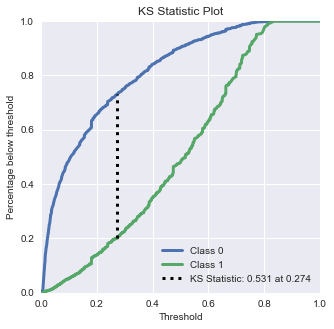

In [185]:
# Compute the predicted probability
pred = np.array([ 1 - fitted_model.predict(), fitted_model.predict() ])

skplt.metrics.plot_ks_statistic(tcc["Churn_Yes"], pred.T, figsize=(5, 5));

0.274 is going to be our threshold. We begin the solution of the business case by considering as potential churners all the observations with a predicted probability of churning greater than 0.274.

/home/matteo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



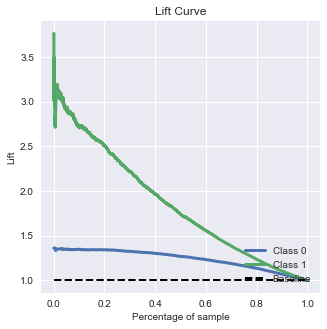

In [214]:
# Lift Chart
skplt.metrics.plot_lift_curve(tcc["Churn_Yes"], pred.T, figsize=(5, 5));

/home/matteo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



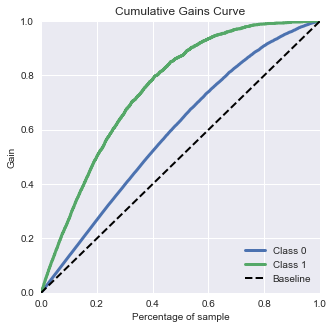

In [218]:
# Gain Chart
skplt.metrics.plot_cumulative_gain(tcc["Churn_Yes"], pred.T, figsize=(5, 5));

## Resampling methods

As a final part of our work, we are going to perform a nonparametric bootstrap to assess the precision of our estimates.

In [196]:
churn = fitted_model.predict()

/home/matteo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



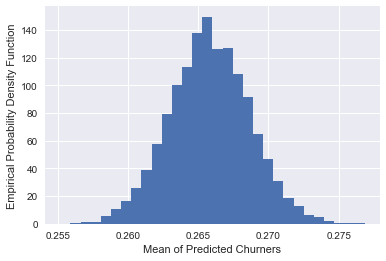

In [197]:
def bootstrap_replicate(data, function):
    bs_sample = np.random.choice(data, len(data))
    return function(bs_sample)

bs_results = np.empty(10000)

for i in range(10000):
    bs_results[i] = bootstrap_replicate(churn, np.mean)

_ = plt.hist(bs_results, bins = 30, normed = True)
_ = plt.xlabel("Mean of Predicted Churners")
_ = plt.ylabel("Empirical Probability Density Function")
plt.show()

In [198]:
print("Bootstrap confidence interval:", np.percentile(bs_results, [2.5, 97.5]))
print("Bootstrap mean:", bs_results.mean())

Bootstrap confidence interval: [0.260145  0.2715121]
Bootstrap mean: 0.2658044712126022


Let's compare the estimates of our prediction with the mean of the sample.

In [199]:
print("Sample mean:", tcc.Churn_Yes.mean())

Sample mean: 0.26578498293515357


Our prediction is almost identical with respect to the actual churn rate of the sample.

<a id='another_cell'></a>

# Appendix

This regression aims to assess the correlation between additional internet services and _Churn_ also for low values of tenure. We want to prove that the impact of additional services on _Churn_ is causal and not due to an omitted variable or selection bias. This means that additional services are not given as gift to those clients with a higher tenure but they have an actual impact on the churn phenomenon.

In [200]:
low_tenure = tcc[tcc["tenure_0:18"]+tcc["tenure_19:36"]==1]

variables = low_tenure[['SeniorCitizen',
        'Dependents_Yes', 'MultipleLines_Yes',
         'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', "OnlineBackup_Yes", 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'tenure_19:36',
       'tenure_37:54', 'tenure_55:72','intercept']]

# Setting the model
logistical_regression_low = sm.Logit(low_tenure["Churn_Yes"], variables)

# Fitting the model
fitted_model_low = logistical_regression.fit()
fitted_model_low.summary2()

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning:

divide by zero encountered in log

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Optimization terminated successfully.
         Current function value: inf
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2018-12-24 22:00      BIC:                   inf   
No. Observations:        7032                  Log-Likelihood:        -inf  
Df Model:                17                    LL-Null:               0.0000
Df Residuals:            7014                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.2334   0.0832   2.8057 0.0050  0.0704  0.3965
Dependents_Yes              -0.1819   0.0809  -2.2476 0.0246 -0.3405 -0.0233
MultipleLines_Yes            0.1762   0.0758   2.3234 0.0202  0.0276  0.3249
InternetService_DSL          1.0541   0.1282   8.2235 0.0000  0.8029  1.3054
InternetService_Fiber optic  1.8322   0.1310  13.9916 0.0000  1.5756  2.0889
OnlineSecurity_Yes          -0.4310   0.0836  -5.1557 0.0000 -0.5948 -0.2671
TechSupport_Yes             -0.3706   0.0846  -4.3795 0.0000 -0.5364 -0.2047
OnlineBackup_Yes            -0.1864   0.0755  -2.4685 0.0136 -0.3344 -0.0384
StreamingTV_Yes              0.2662   0.0785   3.3903 0.0007  0.1123  0.4200
StreamingMovies_Yes          0.2812   0.0782   3.5963 0.0003  0.1280  0.4345
Contract_One year           -0.8483   0.1057  -8.0254 0.0000 -1.0555 -0.6412
Contract_Two year           -1.7220   0.1766  -9.7507 0.0000 -2.0681 -1.3759
PaperlessBilling_Yes         0.3538   0.0738   4.7938 0.0000  0.2091  0.4984
PaymentMethod_Automatic     -0.3145   0.0719  -4.3764 0.0000 -0.4553 -0.1736
tenure_19:36                -1.0135   0.0919 -11.0306 0.0000 -1.1935 -0.8334
tenure_37:54                -1.0141   0.1102  -9.2040 0.0000 -1.2300 -0.7981
tenure_55:72                -1.4425   0.1367 -10.5496 0.0000 -1.7105 -1.1745
intercept                   -1.5123   0.1120 -13.5003 0.0000 -1.7319 -1.2928
============================================================================

"""

CLICK [HERE](#HERE) TO GO KEEP READING